# Figure 4: Artifical dataset differences: ERA5 vs CMIP6 multi-model mean

(c) 2023 under a MIT License (https://mit-license.org)

Author: Lukas Brunner (l.brunner@univie.ac.at)

In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

from core.mapplot import plot_map, plot_hatching, plot_boxes
from core.lineplot import (
    lineplot, 
    barplot_monthly, 
    barplot_monthly_difference, 
    blue, 
    red,
)
from core.io_functions import model_names, get_filename, PLOT_PATH

mpl.rc('font', **{'size': 6})
cm = 1/2.54  # centimeters in inches

ERROR 1: PROJ: proj_create_from_database: Open of /jetfs/home/lbrunner/.conda/envs/model_learning/share/proj failed


In [2]:
#  load ERA5 and CanESM5
era5 = xr.open_dataset(get_filename())
canesm5 = xr.open_dataset(get_filename('CanESM5'))

# load all CMIP6 models and calculate the frequency difference to ERA5
models_diff = []
for model in model_names:
    da = (xr.open_dataset(get_filename(model))['exceedances'] > 0).mean('time')
    da = (da - (era5['exceedances'] > 0).mean('time')) / (era5['exceedances'] > 0).mean('time') * 100
    da = da.expand_dims({'model': [model]})
    models_diff.append(da)
    
models_diff = xr.concat(models_diff, dim='model')    

## Figure 4a: map of multi model mean difference to ERA5

Mean (0/5/95/100 perc): -1.5% (-18.1%/-6.9%/5.4%/45.2%)
Fraction robust: 37.3%
lat=-3.75, lon=306.25


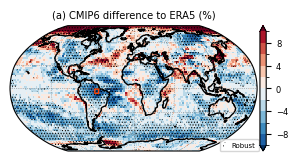

In [3]:
fig, ax = plot_map(models_diff.mean('model'), levels=np.arange(-10, 11, 2))
plot_hatching(ax, models_diff, min_value=2)
plot_boxes(ax, models_diff, [(-4, 305.25)])
ax.set_title('(a) CMIP6 difference to ERA5 (%)')
fig.tight_layout()
# fig.savefig(os.path.join(PLOT_PATH, 'figure4a.png'))
fig.savefig(os.path.join(PLOT_PATH, 'figure4a.pdf'))

## Figure 4c: Timeseries of difference between CanESM5 and ERA5

Annual mean bias: -3.3%
Mean relative difference: -18.4%


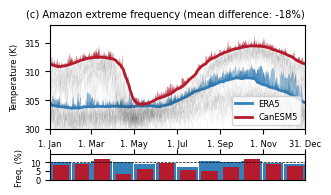

In [8]:
fig = plt.figure(figsize=(8*cm, 4.5*cm))
gs = fig.add_gridspec(
    2, 1, height_ratios=(4, 1),
    bottom=0.03, top=0.9, left=.13, right=.94, hspace=0.38)

ax1 = fig.add_subplot(gs[0])
lineplot(
    ax1, 
    era5['tasmax'].sel(lat=-3.75, lon=306.25).values,
    threshold=era5['threshold'].sel(lat=-3.75, lon=306.25).values,
    ylim=(300, 318),
    color=blue,
    show_legend=False,
)
lineplot(
    ax1, 
    canesm5['tasmax'].sel(lat=-3.75, lon=306.25).values,
    threshold=canesm5['threshold'].sel(lat=-3.75, lon=306.25).values,
    show_legend=False,
    )

hh1, = ax1.plot([], lw=2, color=blue, label='ERA5')
hh2, = ax1.plot([], lw=2, color=red, label='CanESM5')
ax1.legend(handles=[hh1, hh2], loc='lower right')


ax2 = fig.add_subplot(gs[1], sharex=ax1)
barplot_monthly(
    ax2, 
    era5['exceedances'].sel(lat=-3.75, lon=306.25), 
    percentile=90,
    color=blue,
    show_bias=False,
)
barplot_monthly_difference(
    ax2, 
    canesm5['exceedances'].sel(lat=-3.75, lon=306.25), 
    era5['exceedances'].sel(lat=-3.75, lon=306.25), 
    show_bias=False,
)
ax2.tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)

ax1.set_title('(c) Amazon extreme frequency (mean difference: -18%)', loc='right')
# fig.savefig(os.path.join(PLOT_PATH, 'figure4c.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure4c.pdf'))

# Figure 4b: multi model mean difference to ERA5 corrected

In [5]:
# load all CMIP6 models and calculate the frequency difference to ERA5

era5 = (xr.open_dataset(get_filename())['exceedances_deseasonalized'] > 0).mean('time')

models_diff_corr = []
for model in model_names:
    da = (xr.open_dataset(get_filename(model))['exceedances_deseasonalized'] > 0).mean('time')
    da = (da - era5) / era5 * 100
    da = da.expand_dims({'model': [model]})
    models_diff_corr.append(da)
    
models_diff_corr = xr.concat(models_diff_corr, dim='model')    

Mean (0/5/95/100 perc): -0.2% (-5.1%/-1.4%/0.9%/4.8%)
Fraction robust: 1.9%


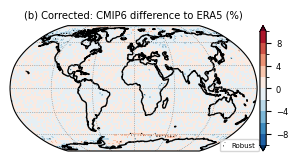

In [6]:
fig, ax = plot_map(models_diff_corr.mean('model'), levels=np.arange(-10, 11, 2))
plot_hatching(ax, models_diff_corr, min_value=2)
# plot_boxes(ax, models_diff_corr, [(-4, 305.25)])
ax.set_title('(b) Corrected: CMIP6 difference to ERA5 (%)')
fig.tight_layout()
# fig.savefig(os.path.join(PLOT_PATH, 'figure4b.png'))
fig.savefig(os.path.join(PLOT_PATH, 'figure4b.pdf'))

## Figure 4d: Timeseries of difference between CanESM5 and ERA5 corrected

Annual mean bias: 0.6%
Mean relative difference: -3.1%


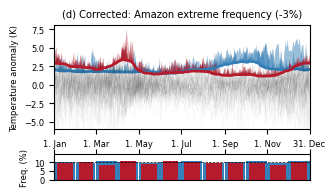

In [7]:
era5 = xr.open_dataset(get_filename())
canesm5 = xr.open_dataset(get_filename('CanESM5'))

fig = plt.figure(figsize=(8*cm, 4.5*cm))
gs = fig.add_gridspec(
    2, 1, height_ratios=(4, 1),
    bottom=0.03, top=0.9, left=.13, right=.94, hspace=0.38)

ax1 = fig.add_subplot(gs[0])
lineplot(
    ax1, 
    era5['tasmax_deseasonalized'].sel(lat=-3.75, lon=306.25).values,
    threshold=era5['threshold_deseasonalized'].sel(lat=-3.75, lon=306.25).values,
    ylim=(-6, 8),
    color=blue,
    show_legend=False,
)
lineplot(
    ax1, 
    canesm5['tasmax_deseasonalized'].sel(lat=-3.75, lon=306.25).values,
    threshold=canesm5['threshold_deseasonalized'].sel(lat=-3.75, lon=306.25).values,
    show_legend=False,
    )

hh1, = ax1.plot([], lw=2, color=blue, label='ERA5')
hh2, = ax1.plot([], lw=2, color=red, label='CanESM5')
# ax1.legend(handles=[hh1, hh2])


ax2 = fig.add_subplot(gs[1], sharex=ax1)
barplot_monthly(
    ax2, 
    era5['exceedances_deseasonalized'].sel(lat=-3.75, lon=306.25), 
    percentile=90,
    color=blue,
    show_bias=False,

)
barplot_monthly_difference(
    ax2, 
    canesm5['exceedances_deseasonalized'].sel(lat=-3.75, lon=306.25), 
    era5['exceedances_deseasonalized'].sel(lat=-3.75, lon=306.25), 
    show_bias=False,
)
ax2.tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)

ax1.set_title('(d) Corrected: Amazon extreme frequency (-3%)')
# fig.savefig(os.path.join(PLOT_PATH, 'figure4d.png'), dpi=300)
fig.savefig(os.path.join(PLOT_PATH, 'figure4d.pdf'), dpi=300)